# Análise exploratória de dados

## Parte 1 - Limpeza dos dados 

### Carregamento

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('dados/2019-09-09_Disque_Economia_-_Base_de_Dados.csv', sep = ';', encoding = 'latin-1', infer_datetime_format = True)

In [4]:
df_prod = pd.read_csv('dados/2019-09-09_Disque_Economia_-_Produto_-_Base_de_Dados.csv', sep = ';', encoding = 'latin-1')

### Reconhecimento da base

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456307 entries, 0 to 456306
Data columns (total 25 columns):
DATA_PESQUISA                            456307 non-null object
PRECO_PESQUISADO                         456307 non-null float64
CODIGO_ESTABELECIMENTO                   456307 non-null int64
CODIGO_ESTABELECIMENTO_FILIAL            456307 non-null int64
ENDERECO_ESTABELECIMENTO                 456307 non-null object
NUMERO_ENDERECO_ESTABELECIMENTO          456307 non-null float64
COMPLEMENTO_ENDERECO_ESTABELECIMENTO     55371 non-null object
TELEFONE_ESTABELECIMENTO                 456307 non-null object
CIDADE_ESTABELECIMENTO                   456307 non-null object
ESTADO_ESTABELECIMENTO                   456307 non-null object
CODIGO_BAIRRO                            456307 non-null int64
DESCRICAO_BAIRRO                         456307 non-null object
ESTABELECIMENTO_REDE                     456307 non-null object
ESTABELECIMENTO_RAZAO_SOCIAL             456307 non-null ob

In [4]:
df.describe()

,PRECO_PESQUISADO,CODIGO_ESTABELECIMENTO,CODIGO_ESTABELECIMENTO_FILIAL,NUMERO_ENDERECO_ESTABELECIMENTO,CODIGO_BAIRRO,CODIGO_CATEGORIA_PRODUTO,DESCRICAO_CATEGORIA_PRODUTO,CODIGO_PRODUTO,PRODUTO_QTD_EMBALAGEM,CODIGO_TIPO_UNIDADE_MEDIDA_PRODUTO,CODIGO_TIPO_EMBALAGEM_PRODUTO
count,456307.000000,456307.0000,456307.000000,456307.000000,456307.000000,456307.000000,456307.000000,456307.000000,456307.000000,456307.000000,456307.000000
mean,7.034926,16.7198,22.859044,2237.910121,37.098738,8.480438,8.480438,243.979152,227.732687,2.189872,8.366562
std,6.673244,10.2960,75.082391,1990.904027,20.451588,4.506772,4.506772,135.338446,243.176693,1.276461,3.345193
min,0.350000,1.0000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.890000,6.0000,1.000000,320.000000,20.000000,5.000000,5.000000,138.000000,1.000000,1.000000,6.000000
50%,4.590000,18.0000,2.000000,2126.000000,37.000000,7.000000,7.000000,232.000000,100.000000,2.000000,8.000000
75%,8.980000,26.0000,13.000000,3300.000000,56.000000,13.000000,13.000000,355.000000,500.000000,2.000000,11.000000
max,66.350000,33.0000,945.000000,10000.000000,75.000000,15.000000,15.000000,477.000000,908.000000,9.000000,19.000000


In [3]:
df['DATA_PESQUISA'] = pd.to_datetime(df['DATA_PESQUISA'], format = '%d/%m/%Y')

In [4]:
df[df.isna().any(axis=1)]

,DATA_PESQUISA,PRECO_PESQUISADO,CODIGO_ESTABELECIMENTO,CODIGO_ESTABELECIMENTO_FILIAL,ENDERECO_ESTABELECIMENTO,NUMERO_ENDERECO_ESTABELECIMENTO,COMPLEMENTO_ENDERECO_ESTABELECIMENTO,TELEFONE_ESTABELECIMENTO,CIDADE_ESTABELECIMENTO,ESTADO_ESTABELECIMENTO,...,DESCRICAO_CATEGORIA_PRODUTO,CODIGO_PRODUTO,PRODUTO_DESCRICAO,PRODUTO_QTD_EMBALAGEM,CODIGO_TIPO_UNIDADE_MEDIDA_PRODUTO,TIPO_UNIDADE_MEDIDA_PRODUTO_DESCRICAO,TIPO_UNIDADE_MEDIDA_PRODUTO_SIGLA,CODIGO_TIPO_EMBALAGEM_PRODUTO,TIPO_EMBALAGEM_PRODUTO_DESCRICAO,TIPO_EMBALAGEM_PRODUTO_SIGLA
9,2019-06-18,3.57,14,53,AV. VICTOR FERREIRA DO AMARAL,1048.0,NaN,3544-6200,CURITIBA,PR,...,1,2,Adoçante Em Po/ Acucar Light,500.0,2,GRAMA,GR,11,PACOTE,PCT
10,2019-06-18,3.57,2,53,RUA JOAO BETTEGA,3930.0,NaN,38882253,CURITIBA,PR,...,1,2,Adoçante Em Po/ Acucar Light,500.0,2,GRAMA,GR,11,PACOTE,PCT
11,2019-06-18,1.99,14,53,AV. VICTOR FERREIRA DO AMARAL,1048.0,NaN,3544-6200,CURITIBA,PR,...,1,4,Acucar Refinado ( + Barato ),1.0,1,KILOGRAMA,KG,11,PACOTE,PCT
12,2019-06-18,1.99,2,53,RUA JOAO BETTEGA,3930.0,NaN,38882253,CURITIBA,PR,...,1,4,Acucar Refinado ( + Barato ),1.0,1,KILOGRAMA,KG,11,PACOTE,PCT
13,2019-06-18,2.25,14,53,AV. VICTOR FERREIRA DO AMARAL,1048.0,NaN,3544-6200,CURITIBA,PR,...,1,11,Farinha de Trigo Especial (+ Barato),1.0,1,KILOGRAMA,KG,11,PACOTE,PCT
14,2019-06-18,2.25,2,53,RUA JOAO BETTEGA,3930.0,NaN,38882253,CURITIBA,PR,...,1,11,Farinha de Trigo Especial (+ Barato),1.0,1,KILOGRAMA,KG,11,PACOTE,PCT
15,2019-06-18,3.57,14,53,AV. VICTOR FERREIRA DO AMARAL,1048.0,NaN,3544-6200,CURITIBA,PR,...,1,18,Mistura para Bolo ( + Barato ),450.0,2,GRAMA,GR,4,CAIXA,CXA
16,2019-06-18,3.57,2,53,RUA JOAO BETTEGA,3930.0,NaN,38882253,CURITIBA,PR,...,1,18,Mistura para Bolo ( + Barato ),450.0,2,GRAMA,GR,4,CAIXA,CXA
17,2019-06-18,9.98,14,53,AV. VICTOR FERREIRA DO AMARAL,1048.0,NaN,3544-6200,CURITIBA,PR,...,2,34,Arroz Branco Tipo 1 ( + Barato ),5.0,1,KILOGRAMA,KG,11,PACOTE,PCT
18,2019-06-18,9.98,2,53,RUA JOAO BETTEGA,3930.0,NaN,38882253,CURITIBA,PR,...,2,34,Arroz Branco Tipo 1 ( + Barato ),5.0,1,KILOGRAMA,KG,11,PACOTE,PCT


In [5]:
df.drop(columns = 'COMPLEMENTO_ENDERECO_ESTABELECIMENTO', inplace = True) #only column with mostly NaN values
df[df.isna().any(axis=1)]

,DATA_PESQUISA,PRECO_PESQUISADO,CODIGO_ESTABELECIMENTO,CODIGO_ESTABELECIMENTO_FILIAL,ENDERECO_ESTABELECIMENTO,NUMERO_ENDERECO_ESTABELECIMENTO,TELEFONE_ESTABELECIMENTO,CIDADE_ESTABELECIMENTO,ESTADO_ESTABELECIMENTO,CODIGO_BAIRRO,...,DESCRICAO_CATEGORIA_PRODUTO,CODIGO_PRODUTO,PRODUTO_DESCRICAO,PRODUTO_QTD_EMBALAGEM,CODIGO_TIPO_UNIDADE_MEDIDA_PRODUTO,TIPO_UNIDADE_MEDIDA_PRODUTO_DESCRICAO,TIPO_UNIDADE_MEDIDA_PRODUTO_SIGLA,CODIGO_TIPO_EMBALAGEM_PRODUTO,TIPO_EMBALAGEM_PRODUTO_DESCRICAO,TIPO_EMBALAGEM_PRODUTO_SIGLA


In [6]:
df['PRODUTO_DESCRICAO'] = df['PRODUTO_DESCRICAO'].str.lower() #normalizando descrição
df["PRODUTO_QTD_EMBALAGEM"] = df["PRODUTO_QTD_EMBALAGEM"].astype(int)

In [7]:
df.to_csv('dados/2019-09-09_Disque_Economia_-_Base_de_Dados-limpo.csv')

In [81]:
df_prod.groupby('CATEGORIA_PRODUTO').size().reset_index(name = 'n° produtos')

,CATEGORIA_PRODUTO,n° produtos
0,-----------------,1
1,"BEBIDAS, CAFE E Cia.",28
2,BISCOITO,16
3,CARNES E FRIOS,44
4,CEREAIS,17
5,CONFEITARIA E PANIFICACAO,19
6,HORTIFRUTIGRANJEIROS,47
7,LATICINIOS,23
8,MASSAS,9
9,MATERIAL DE HIGIENE,20


In [62]:
categorias = ['CONFEITARIA E PANIFICACAO','CEREAIS','MERCEARIA','MASSAS','BISCOITO','MOLHO E CONDIMENTOS','CARNES E FRIOS','LATICINIOS','BEBIDAS, CAFE E Cia','MATERIAL DE HIGIENE','MATERIAL DE LIMPEZA','HORTIFRUTIGRANJEIROS','PRODUTOS EPOCAS ESPECIAIS']

## Modelagem

In [8]:
from statsmodels.formula.api import ols

model = ols("aluguel ~ quartos + area + vaga", data=df)
response = model.fit()
response.summary()

In [ ]:
novo_apartamento = pd.DataFrame([{'quartos': 2, 'area': 60, 'vaga': 1}])
response.predict(novo_apartamento)

### DataFrame Secundário

In [9]:
#Criação de df secundário
df2 = df[df['DATA_PESQUISA']>='2019-08-01']
df2 = df2[['DATA_PESQUISA', 'PRECO_PESQUISADO', 'PRODUTO_DESCRICAO', 'CODIGO_PRODUTO', 'PRODUTO_QTD_EMBALAGEM', 'TIPO_EMBALAGEM_PRODUTO_DESCRICAO', 'CODIGO_ESTABELECIMENTO', 'ESTABELECIMENTO_REDE', 'DESCRICAO_CATEGORIA_PRODUTO']]
df2.shape

(223729, 9)

In [ ]:
#df2.groupby(['PRODUTO_DESCRICAO', 'CODIGO_ESTABELECIMENTO']).count()

In [12]:
df.corr()

,PRECO_PESQUISADO,CODIGO_ESTABELECIMENTO,CODIGO_ESTABELECIMENTO_FILIAL,NUMERO_ENDERECO_ESTABELECIMENTO,CODIGO_BAIRRO,CODIGO_CATEGORIA_PRODUTO,DESCRICAO_CATEGORIA_PRODUTO,CODIGO_PRODUTO,PRODUTO_QTD_EMBALAGEM,CODIGO_TIPO_UNIDADE_MEDIDA_PRODUTO,CODIGO_TIPO_EMBALAGEM_PRODUTO
PRECO_PESQUISADO,1.000000,0.010939,-0.013525,-0.002104,0.003559,-0.146394,-0.146394,-0.144873,-0.067442,-0.221229,-0.086173
CODIGO_ESTABELECIMENTO,0.010939,1.000000,-0.244920,-0.128688,-0.080884,0.002077,0.002077,0.002065,-0.005707,-0.001523,-0.003347
CODIGO_ESTABELECIMENTO_FILIAL,-0.013525,-0.244920,1.000000,-0.089315,-0.144781,0.001399,0.001399,0.001323,0.006684,0.004229,0.000330
NUMERO_ENDERECO_ESTABELECIMENTO,-0.002104,-0.128688,-0.089315,1.000000,0.367857,-0.000385,-0.000385,0.000248,-0.000526,-0.002492,-0.000263
CODIGO_BAIRRO,0.003559,-0.080884,-0.144781,0.367857,1.000000,-0.000227,-0.000227,0.000537,-0.003619,-0.003908,-0.001294
CODIGO_CATEGORIA_PRODUTO,-0.146394,0.002077,0.001399,-0.000385,-0.000227,1.000000,1.000000,0.987380,-0.131090,0.311917,-0.198948
DESCRICAO_CATEGORIA_PRODUTO,-0.146394,0.002077,0.001399,-0.000385,-0.000227,1.000000,1.000000,0.987380,-0.131090,0.311917,-0.198948
CODIGO_PRODUTO,-0.144873,0.002065,0.001323,0.000248,0.000537,0.987380,0.987380,1.000000,-0.125812,0.277581,-0.205162
PRODUTO_QTD_EMBALAGEM,-0.067442,-0.005707,0.006684,-0.000526,-0.003619,-0.131090,-0.131090,-0.125812,1.000000,0.154343,-0.150180
CODIGO_TIPO_UNIDADE_MEDIDA_PRODUTO,-0.221229,-0.001523,0.004229,-0.002492,-0.003908,0.311917,0.311917,0.277581,0.154343,1.000000,0.001145


# Parte 2 - Análise exploratória

In [48]:
#selecionando uma cesta com cereais, biscoitos e massas
df_cesta = df2[(df2['DESCRICAO_CATEGORIA_PRODUTO']==2) | (df2['DESCRICAO_CATEGORIA_PRODUTO']==4)| (df2['DESCRICAO_CATEGORIA_PRODUTO']==5)] 
df_cesta.head()

,DATA_PESQUISA,PRECO_PESQUISADO,PRODUTO_DESCRICAO,CODIGO_PRODUTO,PRODUTO_QTD_EMBALAGEM,TIPO_EMBALAGEM_PRODUTO_DESCRICAO,CODIGO_ESTABELECIMENTO,ESTABELECIMENTO_REDE,DESCRICAO_CATEGORIA_PRODUTO
232583,2019-08-01,9.15,arroz branco tipo 1 ( + barato ),34,5,PACOTE,1,BIG,2
232584,2019-08-01,11.90,"arroz parboilizado tipo 1 ""buriti""",36,5,PACOTE,1,BIG,2
232585,2019-08-01,7.99,"feijao carioquinha ""caldo bom""",43,1,PACOTE,1,BIG,2
232586,2019-08-01,6.29,"feijao preto ""caldo bom""",45,1,PACOTE,1,BIG,2
232595,2019-08-01,3.35,macarrao c/ ovos conchinha ( + barato ),111,500,PACOTE,1,BIG,4


In [50]:
df_basico = df2[df2['PRODUTO_DESCRICAO'].str.contains("arroz", 'feijao') & (df2["PRODUTO_QTD_EMBALAGEM"]==1)]
df_basico.head()

,DATA_PESQUISA,PRECO_PESQUISADO,PRODUTO_DESCRICAO,CODIGO_PRODUTO,PRODUTO_QTD_EMBALAGEM,TIPO_EMBALAGEM_PRODUTO_DESCRICAO,CODIGO_ESTABELECIMENTO,ESTABELECIMENTO_REDE,DESCRICAO_CATEGORIA_PRODUTO
239694,2019-08-01,2.45,arroz parboilizado tipo 1 ( + barato ),35,1,PACOTE,1,BIG,2
239778,2019-08-01,2.45,arroz parboilizado tipo 1 ( + barato ),35,1,PACOTE,2,CONDOR,2
239867,2019-08-01,2.45,arroz parboilizado tipo 1 ( + barato ),35,1,PACOTE,1,BIG,2
239868,2019-08-01,2.45,arroz parboilizado tipo 1 ( + barato ),35,1,PACOTE,16,WAL-MART,2
240045,2019-08-01,2.59,arroz parboilizado tipo 1 ( + barato ),35,1,PACOTE,4,FESTVAL,2


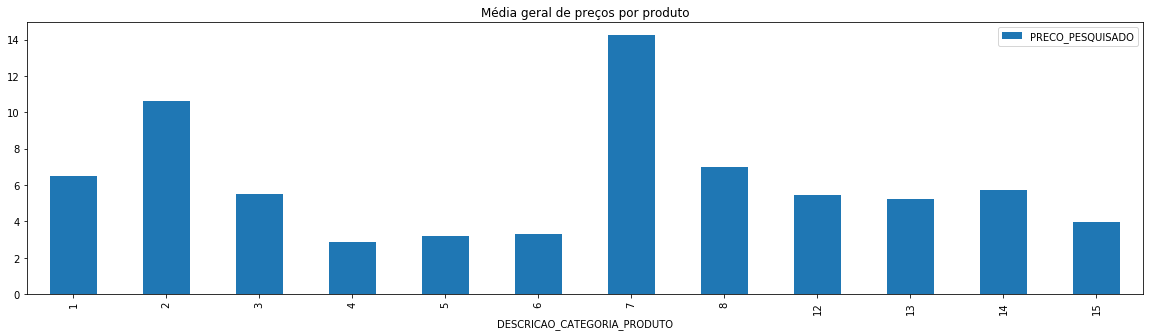

In [82]:
#media geral de preços por produto
df_avg_price = df2.groupby('DESCRICAO_CATEGORIA_PRODUTO')[['PRECO_PESQUISADO']].mean()
df_avg_price.plot.bar(figsize = (20,5), title = 'Média geral de preços por produto')

In [83]:
#média de preço por produto por estabelecimento
df2_pivot = pd.pivot_table(df2, values = 'PRECO_PESQUISADO', index = 'ESTABELECIMENTO_REDE', columns = 'DESCRICAO_CATEGORIA_PRODUTO', aggfunc=np.average)

In [84]:
df2_pivot.style.background_gradient(cmap = 'RdBu')

DESCRICAO_CATEGORIA_PRODUTO,1,2,3,4,5,6,7,8,12,13,14,15
ESTABELECIMENTO_REDE,,,,,,,,,,,,
AGRICER,6.53666,10.5117,5.32017,2.84836,3.10687,3.26216,14.1931,7.22095,5.47446,5.23874,5.69067,3.86796
ANGELONI,7.58429,12.2017,5.93733,2.32062,2.92982,3.59769,13.2852,5.3753,5.93756,5.70056,6.00504,5.92286
BIG,6.27118,10.2652,5.7383,2.89174,3.16716,3.41732,13.1802,5.6237,5.58046,5.35958,5.61876,4.11745
CARREFOUR,6.8367,10.5797,5.70603,2.89072,2.9857,3.34963,15.4363,6.72704,5.36045,5.37855,5.52338,4.35426
CASA FIESTA,6.55366,10.2857,5.24252,2.80261,3.10121,3.22645,14.351,7.20235,5.50007,5.17648,5.67526,4.03759
CONDOR,6.41289,11.0927,5.5801,2.92912,3.13271,3.35795,13.6699,6.41144,5.34825,5.1449,5.7434,3.93635
EXTRA,6.84765,10.2665,4.92613,2.63087,2.87341,3.26551,11.7682,5.49873,5.93835,6.6907,5.59411,4.73955
FESTVAL,6.60794,10.7155,5.8903,3.12493,3.25058,3.59999,15.554,6.68253,5.55122,5.35473,5.90185,4.25823
GABAO,6.66614,10.2376,5.17389,2.78538,3.10771,3.23954,14.6426,7.17762,5.49462,5.28438,5.67941,4.02054


In [85]:
#variedade de produtos por supermercado 
df_estab_prod = pd.crosstab(df2['ESTABELECIMENTO_REDE'],df2['DESCRICAO_CATEGORIA_PRODUTO'])
df_estab_prod.head()

DESCRICAO_CATEGORIA_PRODUTO,1,2,3,4,5,6,7,8,12,13,14,15
ESTABELECIMENTO_REDE,,,,,,,,,,,,
AGRICER,725,578,1316,379,581,662,2530,1368,1501,952,1297,1478
ANGELONI,84,70,135,32,57,78,183,149,164,108,129,147
BIG,357,272,705,195,278,321,1064,638,737,475,589,737
CARREFOUR,176,127,312,83,128,161,467,338,352,221,284,333
CASA FIESTA,489,383,880,257,387,448,1681,913,1013,639,878,992


In [89]:
df_basico['MONTH'] = pd.DatetimeIndex(df_basico['DATA_PESQUISA']).month
df_basico.head()

c:\users\raissa\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,DATA_PESQUISA,PRECO_PESQUISADO,PRODUTO_DESCRICAO,CODIGO_PRODUTO,PRODUTO_QTD_EMBALAGEM,TIPO_EMBALAGEM_PRODUTO_DESCRICAO,CODIGO_ESTABELECIMENTO,ESTABELECIMENTO_REDE,DESCRICAO_CATEGORIA_PRODUTO,MONTH
239694,2019-08-01,2.45,arroz parboilizado tipo 1 ( + barato ),35,1,PACOTE,1,BIG,2,8
239778,2019-08-01,2.45,arroz parboilizado tipo 1 ( + barato ),35,1,PACOTE,2,CONDOR,2,8
239867,2019-08-01,2.45,arroz parboilizado tipo 1 ( + barato ),35,1,PACOTE,1,BIG,2,8
239868,2019-08-01,2.45,arroz parboilizado tipo 1 ( + barato ),35,1,PACOTE,16,WAL-MART,2,8
240045,2019-08-01,2.59,arroz parboilizado tipo 1 ( + barato ),35,1,PACOTE,4,FESTVAL,2,8


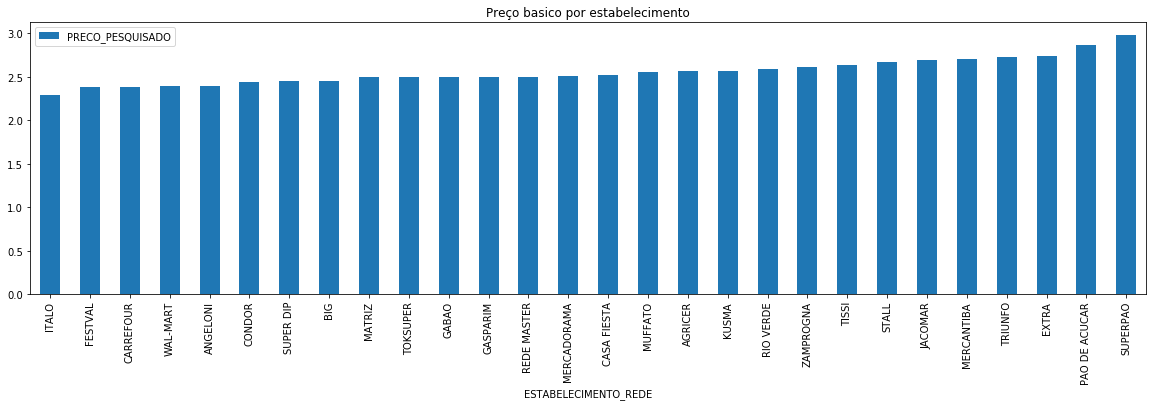

In [99]:
df_basico_price = df_basico.groupby('ESTABELECIMENTO_REDE')[['PRECO_PESQUISADO']].mean().sort_values(by = 'PRECO_PESQUISADO')
df_basico_price.plot.bar(title = 'Preço basico por estabelecimento', figsize = (20,5))

In [101]:
df_basico_price.tail() #Redes mais caras

,PRECO_PESQUISADO
ESTABELECIMENTO_REDE,
MERCANTIBA,2.707407
TRIUNFO,2.726000
EXTRA,2.741429
PAO DE ACUCAR,2.870000
SUPERPAO,2.978000


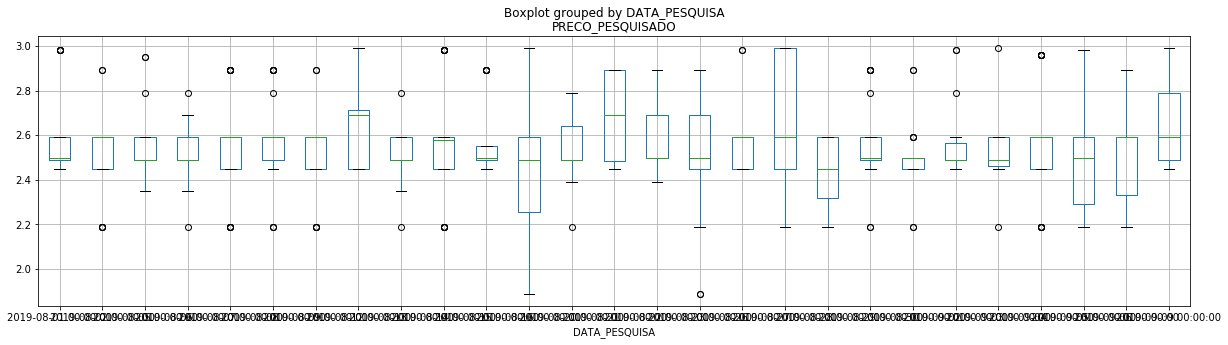

In [95]:
df_basico.boxplot(column = 'PRECO_PESQUISADO', by = 'DATA_PESQUISA', figsize = (20,5))

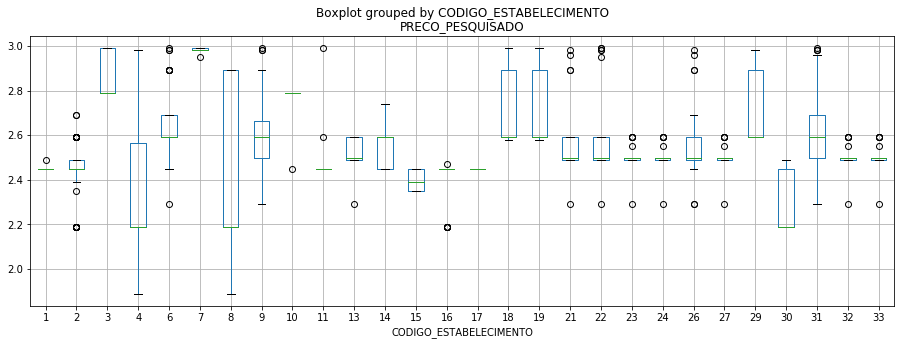

In [102]:
df_basico.boxplot(column = 'PRECO_PESQUISADO', by = 'CODIGO_ESTABELECIMENTO', figsize = (15,5))

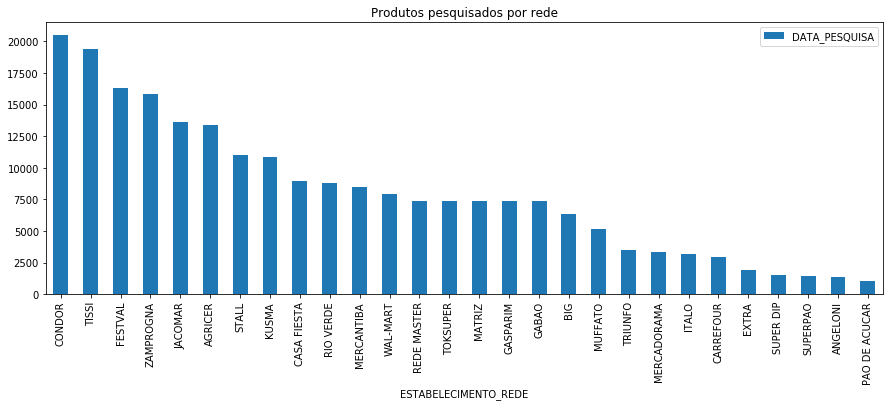

In [27]:
df2.groupby('ESTABELECIMENTO_REDE')[['DATA_PESQUISA']].count().sort_values(by = 'DATA_PESQUISA', ascending = False).plot.bar(figsize = (15,5), title = 'Produtos pesquisados por rede')

In [43]:
#selecionar produtos
df_total_prod = df2.groupby('PRODUTO_DESCRICAO')[['DATA_PESQUISA', 'ESTABELECIMENTO_REDE']].size().sort_values(ascending = False).reset_index(name = 'TOTAL')
df_total_prod.head()

,PRODUTO_DESCRICAO,TOTAL
0,PANETTONE C/ FRUTAS BAUDUCCO,2155
1,"PANETTONE C/ FRUTAS ""VISCONTI""",1595
2,Creme de Leite ( + Barato ),1410
3,Papel Hig. Folha Picotada ( + Barato ),954
4,CHOCOTTONE BAUDUCCO,893


In [119]:
df2.groupby('PRODUTO_DESCRICAO')[['PRECO_PESQUISADO', 'ESTABELECIMENTO_REDE']].min().sort_values(by = 'PRECO_PESQUISADO', ascending = False).head()

,PRECO_PESQUISADO,ESTABELECIMENTO_REDE
PRODUTO_DESCRICAO,,
formula infantil - 1 semestre aptamil 1,28.90,AGRICER
chocottone avela/trufa/mouse `bauduco`,24.89,CONDOR
formula infantil 2 semestre aptamil 2,24.89,CONDOR
carne bov. picanha,23.98,AGRICER
"panetone c/frutas ""panco""",21.98,AGRICER


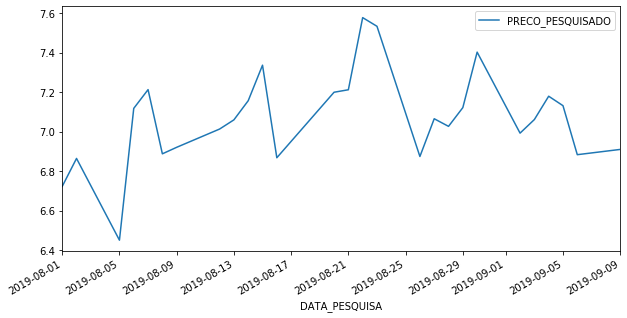

In [118]:
df2.groupby(['DATA_PESQUISA'])[['PRECO_PESQUISADO']].mean().sort_values(by = 'DATA_PESQUISA').plot(figsize = (10,5))